# TEXT-TO-IMAGE GENERATION USING STABLE DIFFUSION AND DIFFUSSERS

In [1]:
!nvidia-smi

Mon Feb 24 16:51:45 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 528.02       Driver Version: 528.02       CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ... WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   41C    P8    N/A /  N/A |      0MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
!pip install diffusers transformers gradio accelerate

In [3]:
from diffusers import StableDiffusionPipeline
import matplotlib.pyplot as plt 
import torch

D:\Codes\Notebook\ml_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
!pip show torch

Name: torch
Version: 2.5.1+cu121
Summary: Tensors and Dynamic neural networks in Python with strong GPU acceleration
Home-page: https://pytorch.org/
Author: PyTorch Team
Author-email: packages@pytorch.org
License: BSD-3-Clause
Location: D:\Codes\Notebook\ml_env\Lib\site-packages
Requires: filelock, fsspec, jinja2, networkx, sympy, typing-extensions
Required-by: accelerate, torchaudio, torchvision


In [5]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [6]:
torch.cuda.empty_cache()
torch.cuda.reset_max_memory_allocated()

D:\Codes\Notebook\ml_env\Lib\site-packages\torch\cuda\memory.py:365: FutureWarning: torch.cuda.reset_max_memory_allocated now calls torch.cuda.reset_peak_memory_stats, which resets /all/ peak memory stats.
  warnings.warn(


In [7]:
device  = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

# LOAD MODELS

In [8]:
model_1 = "dreamlike-art/dreamlike-diffusion-1.0"
model_2 = "stabilityai/stable-diffusion-xl-base-1.0"

pipe = StableDiffusionPipeline.from_pretrained(model_1, torch_dtype=torch.float16, use_safetensors = True)
pipe = pipe.to('cuda')

Loading pipeline components...: 100%|██████████| 5/5 [00:01<00:00,  2.53it/s]
D:\Codes\Notebook\ml_env\Lib\site-packages\torch\nn\modules\module.py:1326: UserWarning: expandable_segments not supported on this platform (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\c10/cuda/CUDAAllocatorConfig.h:28.)
  return t.to(


In [9]:
prompt = "A black man with afro hair in suit at the office"

In [10]:
image = pipe(prompt).images[0]

100%|██████████| 50/50 [02:30<00:00,  3.01s/it]


[Prompt]: A black man with afro hair in suit at the office


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

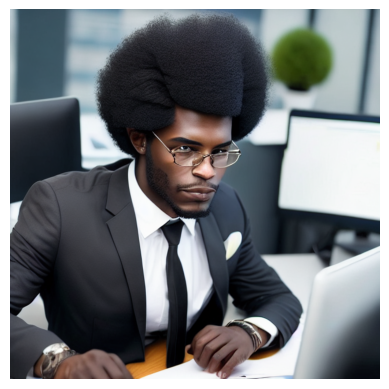

In [11]:
print("[Prompt]:", prompt)
plt.imshow(image)
plt.axis("off")

In [12]:
prompt_2 = "A girl is sitting on a chair & she is accompanied by her tiger. Make sure to keep it cinematic and colorful to be golden iris"

In [13]:
image2 = pipe(prompt_2).images[0]

100%|██████████| 50/50 [02:29<00:00,  3.00s/it]


[PROMPT 2]: A girl is sitting on a chair & she is accompanied by her tiger. Make sure to keep it cinematic and colorful to be golden iris


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

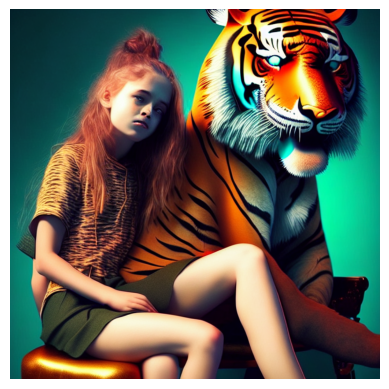

In [14]:
print("[PROMPT 2]:", prompt_2)
plt.imshow(image2)
plt.axis("off")

In [15]:
prompt_3 = "A flyer with an inscription 'Wami Agro Limited' with grains or cereals around it, show the green"

image3 = pipe(prompt_3).images[0]

100%|██████████| 50/50 [02:38<00:00,  3.16s/it]


[PROMPT 3]: A flyer with an inscription 'Wami Agro Limited' with grains or cereals around it, show the green


(np.float64(-0.5), np.float64(639.5), np.float64(639.5), np.float64(-0.5))

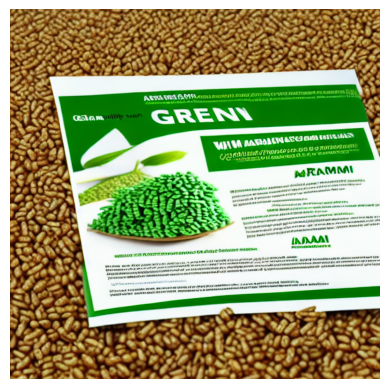

In [16]:
print("[PROMPT 3]:", prompt_3)
plt.imshow(image3)
plt.axis("off")

In [17]:
import os
os.environ['PYTORCH_CUDA_ALLOC_CONF'] = 'expandable_segments:True'

In [18]:
torch.cuda.empty_cache()
torch.cuda.reset_max_memory_allocated()

pipe2 = StableDiffusionPipeline.from_pretrained(model_2, torch_dtype=torch.float16, use_safetensors=True)
pipe2 = pipe2.to('cuda')

In [19]:
prompt = "A girl is sitting on a chair & she is accompanied by her tiger. Make sure to keep it cinematic and colorful to be golden iris"

In [20]:
# TO ADD A FEW PARAMETERS, CHANGING SOME 

def generate_image(pipe, prompt, params):
    img = pipe(prompt, **params).images

    num_images = len(img)
    if num_images > 1:
        fig, ax = plt.subplots(nrows=1, ncols=num_images)
        for i in range(num_images):
            ax[i].imshow(num_images[i])
            ax[i].axis("off")
    else:
        fig = plt.figure()
        plt.imshow(img[0])